# Projet 3: Idée d'applicaton
    1 - Notebook pour le nettoyage (Notebook actuel)
    1 - Notebooke pour l'analyse exploratoire
    1 - PPT pour la présentation de de l'idée
    
    
    **DictReader pour lire le fichier, à creuser

### Notes de cadrage:
 - Après lecture des variables, l'idée qui m'est venue est de proposer une application qui indique si oui ou non un produit sacnnée est compatible avec un régime alimentaire choisi. Pour l'exemple nous choisirons le régime cétogène
 - Caratéristique du régime cétogène : lipide[70-80], protéine [20-25], glucide [5-10]
 - L'application propesera des notes d'infos sur les produits de ce régimes. Ces notes proviendront de l'analyse exploratoire que nous mèneront
 - Une fois la fonction de filtre écrite, il faudra automatiser les étapes de formatage de la data pour que mon application puisse marcher.
 
#Nettoyage : type de données ok ou non? 
#Verifier les données si doublon ou non
#Verifier si j'ai des produits erronnés ou pas
#Vérifier la faisabilité de mon application
#Regarder la correlation entre les produits et le nutriscore (proposer une partie revues, articles)
plotly --- pour la visualisation à explorer 

objetcif de la prochaine séance : nettoyage, univarié et commencer le bivarié
duplicat ou pas? analyse de valeurs manquantes?


### Notes méthodolgie de nettoyage
    1) Ecrire une fonction de suppression de produits dont l'url pointe sur une page d'erreur
    2)Supprimer les doublons
    3)Mettre les valeurs aberrantes en nan
    4)Imputer les nan avec une acp ou les kmeans
    5) Ecrire une fonction de formattag des données pour la l'application

In [117]:
#installation librairie dask
!pip install dask[complete]

### Librairies

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import dask.dataframe as dd
import dask.array as da
import dask

In [17]:
#pour augmnet le nombre de ligne et de colonne à imprimer
pd.options.display.max_rows=200
pd.options.display.max_columns=500
pd.options.display.max_info_columns=500

### Importation des données
    - les données étant massives, le charghement en local pause problème
    - Nous choisirons les variables en fonction de notre idée de projets

In [35]:
# Pour avoir les noms de variables
with open("D:\Openclassrooms\Projets\data\openfoodfacts_products.csv") as file:
    data = csv.DictReader(file, delimiter='\t')
    for row in data:
        rowkey = row.keys()
        break

In [36]:
rowkey

dict_keys(['code', 'url', 'creator', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime', 'product_name', 'abbreviated_product_name', 'generic_name', 'quantity', 'packaging', 'packaging_tags', 'packaging_text', 'brands', 'brands_tags', 'categories', 'categories_tags', 'categories_en', 'origins', 'origins_tags', 'origins_en', 'manufacturing_places', 'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_en', 'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities', 'cities_tags', 'purchase_places', 'stores', 'countries', 'countries_tags', 'countries_en', 'ingredients_text', 'allergens', 'allergens_en', 'traces', 'traces_tags', 'traces_en', 'serving_size', 'serving_quantity', 'no_nutriments', 'additives_n', 'additives', 'additives_tags', 'additives_en', 'ingredients_from_palm_oil_n', 'ingredients_from_palm_oil', 'ingredients_from_palm_oil_tags', 'ingredients_that_may_be_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil', 'ingredients_that

In [37]:
#liste des variables retenues
var = ['code', 'url','product_name','brands_tags','origins','manufacturing_places','first_packaging_code_geo', 'purchase_places','countries','ingredients_text', 'no_nutriments', 'additives_n', 'ingredients_from_palm_oil_n', 'nutriscore_score', 'nutriscore_grade', 'nova_group', 'pnns_groups_1', 'pnns_groups_2','brand_owner', 'ecoscore_score_fr', 'ecoscore_grade_fr', 'main_category', 'energy-kj_100g', 'energy-kcal_100g', 'energy_100g', 'energy-from-fat_100g', 'fat_100g', 'saturated-fat_100g','sugars_100g','fiber_100g', '-soluble-fiber_100g', '-insoluble-fiber_100g', 'proteins_100g','salt_100g', 'sodium_100g','ph_100g','fruits-vegetables-nuts_100g', 'fruits-vegetables-nuts-dried_100g','carbon-footprint_100g','carbon-footprint-from-meat-or-fish_100g', 'nutrition-score-fr_100g', 'nutrition-score-uk_100g', 'glycemic-index_100g']

In [38]:
len(var)

43

In [39]:
pd.DataFrame(var)

,0
0,code
1,url
2,product_name
3,brands_tags
4,origins
5,manufacturing_places
6,first_packaging_code_geo
7,purchase_places
8,countries
9,ingredients_text


In [40]:
# Imporation des données par la méthodolohie du partionnement, utilisation de la librairies dask
df = dd.read_csv("D:\Openclassrooms\Projets\data\openfoodfacts_products.csv", delimiter='\t', usecols=var, low_memory=False, dtype={'brand_owner': 'object',
       'code': 'object',
       'origins': 'object'})

In [41]:
df.head(100)

,code,url,product_name,brands_tags,origins,manufacturing_places,first_packaging_code_geo,purchase_places,countries,ingredients_text,no_nutriments,additives_n,ingredients_from_palm_oil_n,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,brand_owner,ecoscore_score_fr,ecoscore_grade_fr,main_category,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,sugars_100g,fiber_100g,-soluble-fiber_100g,-insoluble-fiber_100g,proteins_100g,salt_100g,sodium_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,Vitória crackers,NaN,NaN,NaN,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,375.0,1569.0,NaN,7.00,3.08,15.00,NaN,NaN,NaN,7.80,1.400,0.5600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000031,http://world-en.openfoodfacts.org/product/0000...,Cacao,NaN,NaN,NaN,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,000000000003327986,http://world-en.openfoodfacts.org/product/0000...,Filetes de pollo empanado,NaN,NaN,NaN,NaN,NaN,en:es,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,000000000004622327,http://world-en.openfoodfacts.org/product/0000...,Hamburguesas de ternera 100%,NaN,NaN,NaN,NaN,NaN,en:es,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,874.9,3661.0,NaN,15.10,6.10,1.00,NaN,NaN,NaN,15.70,2.100,0.8400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000000000100,http://world-en.openfoodfacts.org/product/0000...,moutarde au moût de raisin,courte-paille,NaN,NaN,NaN,NaN,France,eau graines de téguments de moutarde vinaigre ...,NaN,0.0,0.0,18.0,d,NaN,Fat and sauces,Dressings and sauces,NaN,60.0,b,en:mustards,936.0,NaN,936.0,NaN,8.20,2.20,22.00,0.0,NaN,NaN,5.10,4.600,1.8400,NaN,NaN,NaN,NaN,NaN,18.0,NaN,NaN
5,00000000001111111111,http://world-en.openfoodfacts.org/product/0000...,Sfiudwx,watt,NaN,NaN,NaN,NaN,en:France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,NaN,NaN,NaN,fr:xsf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0000000000123,http://world-en.openfoodfacts.org/product/0000...,Sauce Sweety chili 0%,NaN,NaN,NaN,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,21.0,88.0,NaN,0.00,0.00,0.40,NaN,NaN,NaN,0.20,2.040,0.8160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0000000000178,http://world-en.openfoodfacts.org/product/0000...,Mini coco,NaN,NaN,NaN,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,60.0,251.0,NaN,3.00,1.00,3.00,NaN,NaN,NaN,2.00,1.150,0.4600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0000000000208,http://world-en.openfoodfacts.org/product/0000...,Pistou d'ail des ours,NaN,NaN,NaN,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0000000000284,http://world-en.openfoodfacts.org/product/0000...,Pain maïs,NaN,NaN,NaN,NaN,NaN,en:france,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
df.shape

(Delayed('int-155ad172-74bc-4ea0-9731-cc4e17abdab0'), 43)

In [43]:
n_lignes = df.shape[0].compute()

In [44]:
n_lignes

1811863

In [45]:
df.npartitions

64

In [46]:
df.info(verbose=True)

<class 'dask.dataframe.core.DataFrame'>
Int64Index: 1811863 entries, 0 to 14767
Data columns (total 43 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   code                                     1811863 non-null      object
 1   url                                      1811863 non-null      object
 2   product_name                             1733685 non-null      object
 3   brands_tags                              938551 non-null      object
 4   origins                                  78297 non-null      object
 5   manufacturing_places                     115177 non-null      object
 6   first_packaging_code_geo                 70783 non-null      object
 7   purchase_places                          152795 non-null      object
 8   countries                                1806292 non-null      object
 9   ingredients_text                         695630 non-null      object
10   no_n

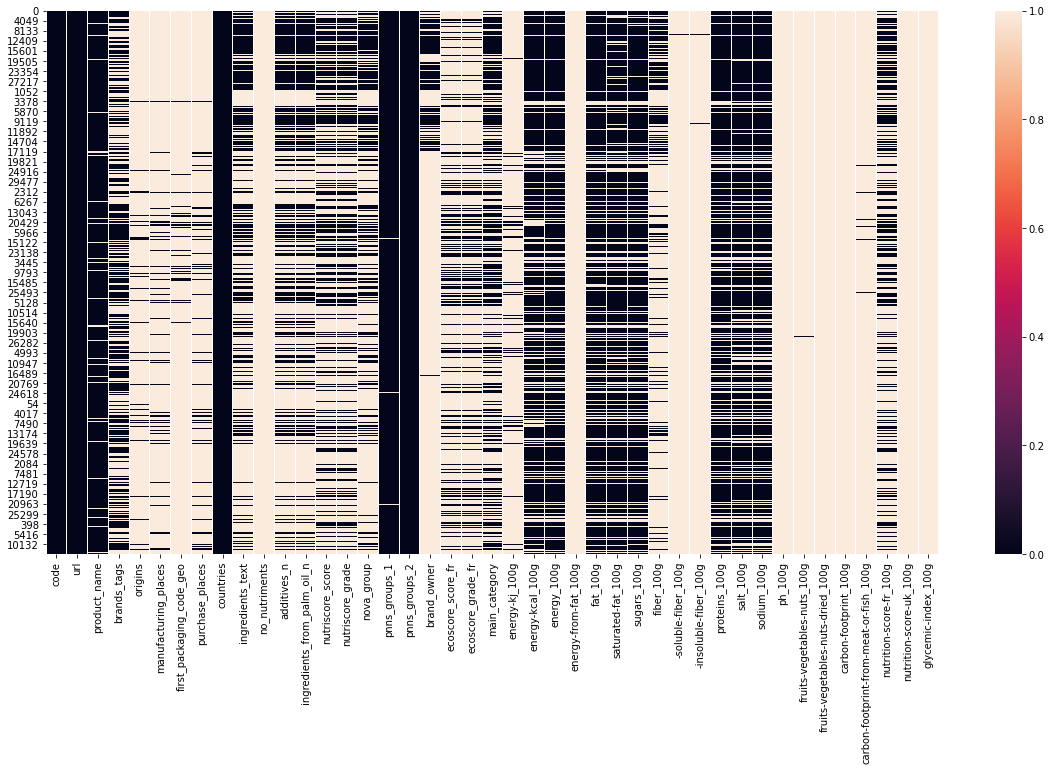

In [47]:
#visualisation des données manquantes dans le jeux de doonées
plt.figure(figsize=(20,10))
sns.heatmap(df.isna().compute())
plt.show()

In [48]:
na_count = df.isna().sum(axis=0).compute()

In [49]:
(na_count*100/n_lignes).sort_values()

code                                         0.000000
url                                          0.000000
pnns_groups_2                                0.028258
countries                                    0.307474
pnns_groups_1                                0.942069
product_name                                 4.314785
energy_100g                                 20.602441
proteins_100g                               20.992150
fat_100g                                    21.050267
sugars_100g                                 22.012205
saturated-fat_100g                          23.446751
energy-kcal_100g                            23.529483
salt_100g                                   24.154365
sodium_100g                                 24.154586
brands_tags                                 48.199671
main_category                               52.297497
additives_n                                 61.606865
ingredients_from_palm_oil_n                 61.606865
ingredients_text            

### Notes:
    Le jeux comporte intitialement 1811863 lignes et 43 variables.
    Il y a des varibales avec bcp de données manquantes. Avant toute impuation,
    les variable avec plus de 90% nan seront supprimées
    /!\ il y a des problèmes de format au niveau des varibales
    Les variables clés (fat_100g, sugars_100g , sugars_100g ) sont plutôt assez bien remplies plus 85% de remplissage
    /!\ Quel est le pourcentage combiné de remplissage ? à surveiller
    /!\ il y a des produit sans nom...
    OK : l'application est réalisable car les données utiles sont disponibles

In [50]:
#Selection des varibales avec moins de 90% de nan
masque = (na_count*100/n_lignes) < 90

In [51]:
#suppresion des varibles très peu remplies
df=df[df.columns[masque]]

In [52]:
df.shape

(Delayed('int-90e59331-e449-4c74-8a93-437b54eac2cd'), 27)

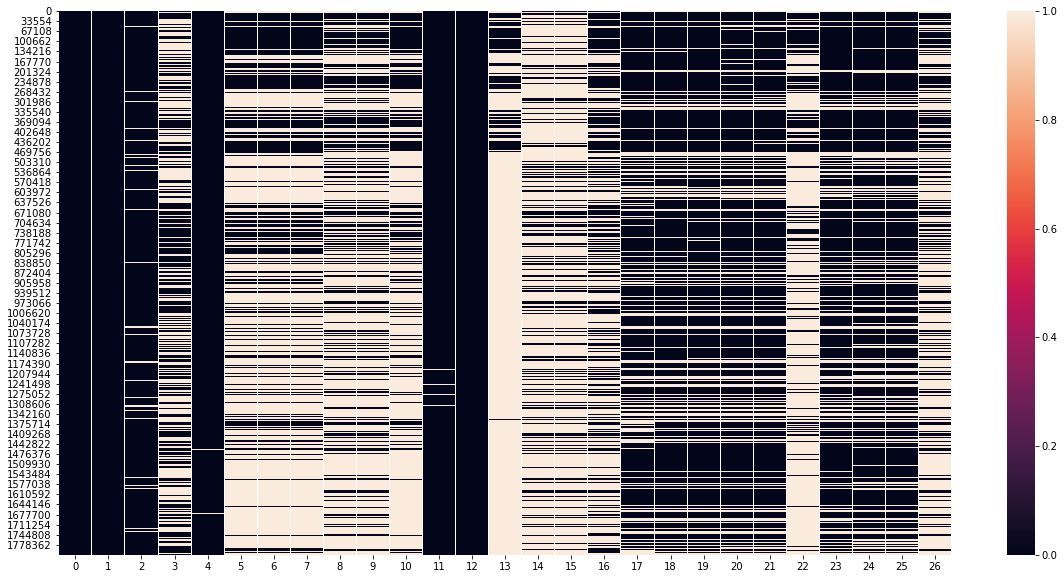

In [53]:
#visualisation des données manquantes dans le jeux de doonées
plt.figure(figsize=(20,10))
sns.heatmap(df.isna())
plt.show()

In [54]:
df.info(verbose=True)

<class 'dask.dataframe.core.DataFrame'>
Int64Index: 1811863 entries, 0 to 14767
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   code                         1811863 non-null      object
 1   url                          1811863 non-null      object
 2   product_name                 1733685 non-null      object
 3   brands_tags                  938551 non-null      object
 4   countries                    1806292 non-null      object
 5   ingredients_text             695630 non-null      object
 6   additives_n                  695631 non-null      float64
 7   ingredients_from_palm_oil_n  695631 non-null      float64
 8   nutriscore_score             671391 non-null      float64
 9   nutriscore_grade             671391 non-null      object
10   nova_group                   607819 non-null      float64
11   pnns_groups_1                1794794 non-null      object
12   pnns_groups_2    

In [55]:
#Suppression de données dupliquées
df_0 = df.drop_duplicates()

In [56]:
# on a une partition maintenant
df_0.npartitions

1

In [57]:
n_lignes_0 = df_0.shape[0].compute()

In [58]:
n_lignes - n_lignes_0
# il n'y a que 2 entrée dupliquées

2

### Analyse des varaibles quantitatives

In [59]:
df_quant = df_0.select_dtypes('float').compute()

In [60]:
var_quant = df_quant.columns

In [61]:
# Analys des var_qanti
df_quant.describe()

,additives_n,ingredients_from_palm_oil_n,nutriscore_score,nova_group,ecoscore_score_fr,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
count,695630.000000,695630.000000,671390.000000,607818.000000,437464.000000,1.385540e+06,1.438574e+06,1.430460e+06,1.387039e+06,1.413031e+06,473190.000000,1.431513e+06,1.374218e+06,1.374214e+06,671395.000000
mean,2.041935,0.020624,9.164474,3.430986,48.332827,6.338970e+06,4.633449e+36,1.472372e+01,1.236991e+01,1.403444e+01,5.134005,8.770491e+00,2.885541e+00,1.154253e+00,9.164538
std,2.913928,0.144043,8.871625,0.964588,25.650236,7.386274e+09,5.557385e+39,8.595680e+02,8.490958e+03,8.415403e+02,1453.738990,1.461875e+02,8.640249e+02,3.456102e+02,8.871634
min,0.000000,0.000000,-15.000000,1.000000,-23.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-20.000000,-5.000000e+02,0.000000e+00,0.000000e+00,-15.000000
25%,0.000000,0.000000,2.000000,3.000000,31.000000,1.010000e+02,4.180000e+02,7.691500e-01,1.000000e-01,6.000000e-01,0.000000,1.300000e+00,7.000000e-02,2.800000e-02,2.000000
50%,1.000000,0.000000,10.000000,4.000000,43.000000,2.620000e+02,1.088000e+03,7.000000e+00,1.800000e+00,3.571400e+00,1.600000,6.000000e+00,5.600000e-01,2.240000e-01,10.000000
75%,3.000000,0.000000,16.000000,4.000000,69.000000,4.000000e+02,1.674000e+03,2.143000e+01,7.140000e+00,1.800000e+01,3.600000,1.230000e+01,1.400000e+00,5.600000e-01,16.000000
max,49.000000,3.000000,40.000000,4.000000,125.000000,8.693855e+12,6.665559e+42,9.999990e+05,9.999999e+06,9.999990e+05,999999.000000,1.730000e+05,9.999990e+05,3.999996e+05,40.000000


#### Note
     /!\ Il y a des produits avec 49 additifs, à controler avec le nombre d'ingrédient...
     /!\ Protéins, fat, satured-fat, sugars, fiber, salt, sodium : certains produits en ont plus de 100g sur 100g (FAIT)
     /!\ Présence anormale de valeurs négatives, soit su contient du sucre ou pas (FAIT)
     /!\ conserver un entre nutrition-score-fr_100g et nutriscore_score (FAIT)
     /!\ Au niveau des valeurs énergetiques, il y a des valeurs qui semblent aberrantes (TRAITER)

### Suppression de la variable 'nutriscore_score' car moins remplie

In [62]:
del df_quant['nutriscore_score']

### Traitement des variables nutritives (sucre, fibre,....)

In [63]:
filtre = df_quant.loc[:,['fat_100g','saturated-fat_100g','sugars_100g','fiber_100g','proteins_100g','salt_100g','sodium_100g']]

In [64]:
filtre_2 = filtre.applymap(lambda x : 0 < x < 100)

In [65]:
#Etiquettons les lignes avec des anomalies comme telle
df_quant['anomalie'] = filtre_2.all(axis=1)*1

In [66]:
# mise en nan des valeurs mal renseignées ( non 0<x<100)
cible = df_quant.loc[:,['fat_100g','saturated-fat_100g','sugars_100g','fiber_100g','proteins_100g','salt_100g','sodium_100g']]
df_quant[['fat_100g','saturated-fat_100g','sugars_100g','fiber_100g','proteins_100g','salt_100g','sodium_100g']] = cible.where((0<cible) & (cible<100))

### Traitement des variables énergetiques

In [67]:
#Traitements des valeurs énergétiques
var_energie = ['energy-kcal_100g','energy_100g']

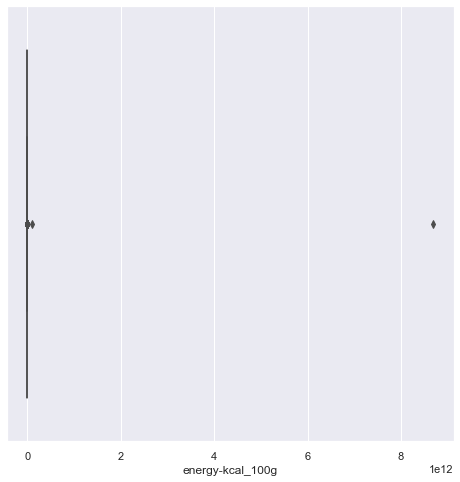

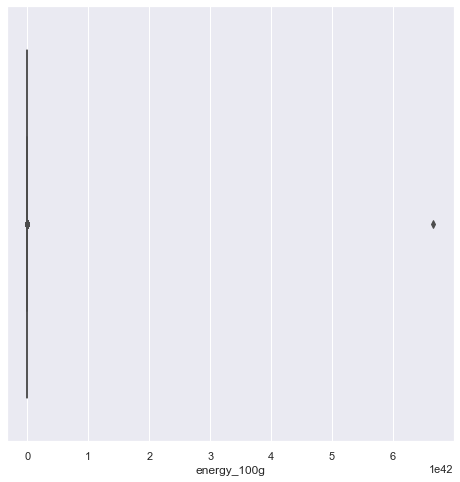

In [68]:
sns.set_style('darkgrid')
sns.set(rc={"figure.figsize":(8, 8)}) 
for col in var_energie:
    plt.figure()
    sns.boxplot(df_quant[col])
    plt.show()

### Les graphique sont écrasés par des valeurs démésurées, sans doute des erreurs des frappes. 
 - D'après les recherche les produit les plus caloriques n'excèdent pas 1000kcal pour 100g, donc au dela  tout produit est mal renseigné!
 - 1kcal = 4.1865 kj. Ainsi le graphique de deux variables énergetiques doit donner une droite. Il n'est neccessaire de conserver ces 2 variables après impuation. On conservera la variable 'energy_kcal-100g'. L'autre servira à faire des impuations.


In [69]:
df_energy = df_quant.loc[(df_quant['energy_100g']<4187) & (df_quant['energy-kcal_100g']<1000)][['energy_100g','energy-kcal_100g']]

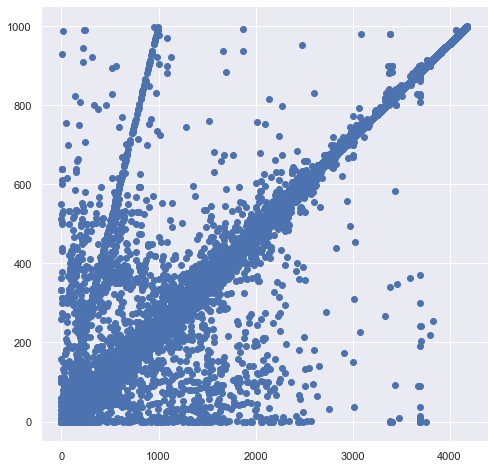

In [70]:
plt.scatter(df_energy['energy_100g'],df_energy['energy-kcal_100g'])

In [71]:
# Quels sont les 100 premiers produits qui sont les plus caloriques dans ce jeu de données?
df_quant['energy-kcal_100g'].value_counts().sort_index(ascending=False).head(100)


8.693855e+12    1
8.864745e+10    1
4.766577e+06    1
2.910000e+06    1
1.333333e+06    1
4.840000e+05    1
4.080000e+05    1
3.800000e+05    1
2.680000e+05    1
2.200000e+05    1
2.082790e+05    1
1.450000e+05    1
1.370000e+05    1
1.000000e+05    1
9.999900e+04    1
7.382010e+04    2
6.000000e+04    1
4.980000e+04    1
4.800000e+04    1
4.600000e+04    1
4.313600e+04    1
4.280700e+04    1
4.183600e+04    1
3.989630e+04    1
3.100000e+04    1
2.900000e+04    1
2.780000e+04    1
2.500000e+04    1
2.400000e+04    2
2.166667e+04    1
2.150500e+04    1
2.100000e+04    2
2.000000e+04    4
1.820000e+04    1
1.800000e+04    1
1.787500e+04    1
1.600000e+04    1
1.500000e+04    2
1.490000e+04    1
1.463000e+04    1
1.310000e+04    1
1.300000e+04    2
1.200000e+04    1
1.121200e+04    1
1.100000e+04    1
1.080000e+04    1
1.044000e+04    1
1.000000e+04    4
9.999000e+03    1
9.380000e+03    1
8.000000e+03    3
7.670000e+03    1
7.000000e+03    2
6.300000e+03    1
6.187910e+03    1
6.000000e+

In [72]:
produit_suspect = df_0.loc[df_0['energy-kcal_100g']>3149][['url','product_name']].compute()

In [73]:
produit_suspect

,url,product_name
29488,http://world-en.openfoodfacts.org/product/0017...,White Cheddar Spread with Almonds
1264,http://world-en.openfoodfacts.org/product/0018...,Frudel
19481,http://world-en.openfoodfacts.org/product/0024...,Honey. Bun
26110,http://world-en.openfoodfacts.org/product/0028...,Lays potato chips
4033,http://world-en.openfoodfacts.org/product/0031...,Brown N Serve Maple Sausage Links
4052,http://world-en.openfoodfacts.org/product/0031...,Brown 'N Serve Original 10 Fully Cooked Sausag...
7790,http://world-en.openfoodfacts.org/product/0033...,Honey crisp apple
24061,http://world-en.openfoodfacts.org/product/0038...,Lemon Cake
5052,http://world-en.openfoodfacts.org/product/0041...,Cheese Sticks-Sharp Chedder
14144,http://world-en.openfoodfacts.org/product/0048...,Vegetable stock


In [74]:
produit_suspect['url']

29488    http://world-en.openfoodfacts.org/product/0017...
1264     http://world-en.openfoodfacts.org/product/0018...
19481    http://world-en.openfoodfacts.org/product/0024...
26110    http://world-en.openfoodfacts.org/product/0028...
4033     http://world-en.openfoodfacts.org/product/0031...
4052     http://world-en.openfoodfacts.org/product/0031...
7790     http://world-en.openfoodfacts.org/product/0033...
24061    http://world-en.openfoodfacts.org/product/0038...
5052     http://world-en.openfoodfacts.org/product/0041...
14144    http://world-en.openfoodfacts.org/product/0048...
14219    http://world-en.openfoodfacts.org/product/0048...
14451    http://world-en.openfoodfacts.org/product/0048...
21882    http://world-en.openfoodfacts.org/product/0051...
314      http://world-en.openfoodfacts.org/product/0055...
3006     http://world-en.openfoodfacts.org/product/0057...
14418    http://world-en.openfoodfacts.org/product/0062...
21951    http://world-en.openfoodfacts.org/product/0067.

### Certains produits ont des url qui ne marchent pas. Donc produit à supprimer.

### Imputation de la variables energy-kcal_100g
    -toutes les valeurs hors de l'intervalle [energy_100g/4.1868 +-10% ] seront imputées avec energy_100g/4.1868

In [75]:
def control(row):
    y = row['energy-kcal_100g']
    a= y*4.1868
    x = row['energy_100g']
    if (x*0.9<=a<=x*1.1) :
        return y
    else:
        return x/4.1868

In [76]:
df_quant['energy-kcal_100g'] = df_quant['energy-kcal_100g'].where(df_quant['energy-kcal_100g'].isna()==False,df_quant['energy_100g']/4.1868)

In [77]:
df_quant['energy-kcal_100g'] = df_quant[['energy-kcal_100g', 'energy_100g']].apply(control, axis=1)

In [78]:
df_quant['energy-kcal_100g'] = df_quant['energy-kcal_100g'].where(df_quant['energy-kcal_100g']<1001)

In [79]:
df_quant['energy-kcal_100g'].describe()

count    1.434712e+06
mean     2.712004e+02
std      1.924795e+02
min      0.000000e+00
25%      1.000000e+02
50%      2.590000e+02
75%      4.000000e+02
max      1.000000e+03
Name: energy-kcal_100g, dtype: float64

<AxesSubplot:xlabel='energy-kcal_100g'>

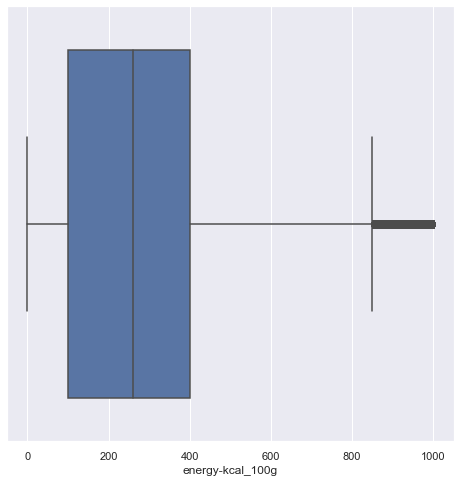

In [80]:
sns.boxplot(df_quant['energy-kcal_100g'])

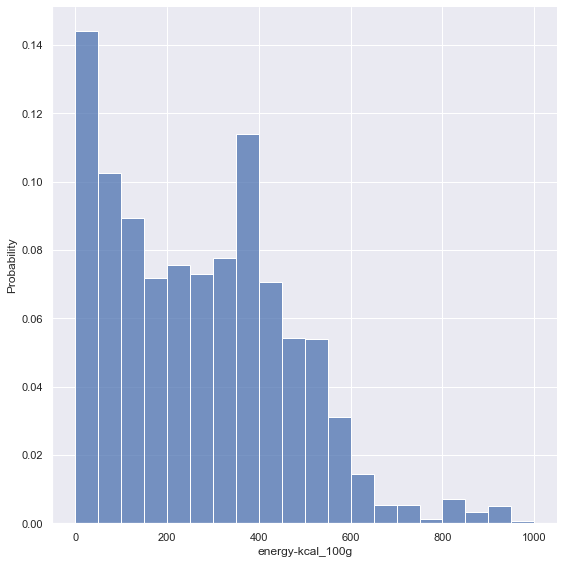

In [81]:
sns.displot(df_quant['energy-kcal_100g'], bins=20, height=8, aspect=1, stat='probability')

### Analyse des variables qualitatives

In [82]:
df_quali = df_0.select_dtypes('object').compute()

In [83]:
df_quali.head(100)

,code,url,product_name,brands_tags,countries,ingredients_text,nutriscore_grade,pnns_groups_1,pnns_groups_2,brand_owner,ecoscore_grade_fr,main_category
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,Vitória crackers,NaN,France,NaN,NaN,unknown,unknown,NaN,NaN,NaN
1,0000000000031,http://world-en.openfoodfacts.org/product/0000...,Cacao,NaN,France,NaN,NaN,unknown,unknown,NaN,NaN,NaN
2,000000000003327986,http://world-en.openfoodfacts.org/product/0000...,Filetes de pollo empanado,NaN,en:es,NaN,NaN,unknown,unknown,NaN,NaN,NaN
3,000000000004622327,http://world-en.openfoodfacts.org/product/0000...,Hamburguesas de ternera 100%,NaN,en:es,NaN,NaN,unknown,unknown,NaN,NaN,NaN
4,0000000000100,http://world-en.openfoodfacts.org/product/0000...,moutarde au moût de raisin,courte-paille,France,eau graines de téguments de moutarde vinaigre ...,d,Fat and sauces,Dressings and sauces,NaN,b,en:mustards
5,00000000001111111111,http://world-en.openfoodfacts.org/product/0000...,Sfiudwx,watt,en:France,NaN,NaN,unknown,unknown,NaN,NaN,fr:xsf
6,0000000000123,http://world-en.openfoodfacts.org/product/0000...,Sauce Sweety chili 0%,NaN,France,NaN,NaN,unknown,unknown,NaN,NaN,NaN
7,0000000000178,http://world-en.openfoodfacts.org/product/0000...,Mini coco,NaN,France,NaN,NaN,unknown,unknown,NaN,NaN,NaN
8,0000000000208,http://world-en.openfoodfacts.org/product/0000...,Pistou d'ail des ours,NaN,France,NaN,NaN,unknown,unknown,NaN,NaN,NaN
9,0000000000284,http://world-en.openfoodfacts.org/product/0000...,Pain maïs,NaN,en:france,NaN,NaN,unknown,unknown,NaN,NaN,NaN


In [84]:
df_quali.iloc[:,3:].describe()

,brands_tags,countries,ingredients_text,nutriscore_grade,pnns_groups_1,pnns_groups_2,brand_owner,ecoscore_grade_fr,main_category
count,938550,1806290,695629,671390,1794792,1811349,289631,437464,864303
unique,128695,10388,584327,5,14,46,25565,5,29827
top,carrefour,France,"Carbonated water, natural flavor.",d,unknown,unknown,"Wal-Mart Stores, Inc.",d,en:snacks
freq,16227,431309,475,209126,1109176,1109176,5389,137010,32885


### Notes :
    -IL y a anormalement trop de pays
    - IL faut créer une variables qui compte le nombre d'ingrédients
    - il faut traiter la variable main_category

### Traitement de la variable countries

In [85]:
def clean_word(x):
    '''
    Fonction pour convertir nettoyer la variable countries et main_category; retirer les marqueurs de langues comme 'es', 'en'
    '''
    if pd.isna(x)==False:
        x=str(x)
        word_splitted = x.split(':')
        try:
            return word_splitted[1].upper()
        except :
            return word_splitted[0].upper()
    else:
        return x

In [86]:
df_quali['countries'] = df_quali['countries'].map(clean_word)

In [87]:
df_quali['countries'].describe()

count     1806290
unique       6430
top        FRANCE
freq       524157
Name: countries, dtype: object

In [88]:
df_quali['countries'].value_counts().head(100)

FRANCE                     524157
UNITED STATES              325887
FR                         209471
ES                         100740
ESPAÑA                      70675
IT                          68140
BE                          38636
SPAIN                       31884
CH                          28418
GERMANY                     26738
DE                          22009
CA                          21412
US                          21334
UNITED KINGDOM              20887
DEUTSCHLAND                 20785
GB                          20444
SUISSE                      10901
SWITZERLAND                 10252
ITALY                        9534
CANADA                       8522
BELGIUM                      8113
AUSTRALIA                    7044
IRELAND, GERMANY             6940
FRANCIA,ESPAÑA               6179
BELGIQUE                     5158
NETHERLANDS                  3560
AU                           3463
IRELAND                      3256
MÉXICO                       3198
ITALIA        

In [89]:
#Traitemeent des Ingredients : obtenir le nombre d'ingédient
df_quali['ingredients_text'].dropna().head(20)

4      eau graines de téguments de moutarde vinaigre ...
23     antioxydant : érythorbate de sodium, colorant ...
31     Lait entier, sucre, amidon de maïs, cacao, Aga...
39     baguette Poite vin Pain baguette 50,6%: farine...
49     Paln suédois 42,6%: farine de BLÉ, eau, farine...
55     Taboulé 76,2%, légumes 12%, huile de colza, se...
56     Bananas, vegetable oil (coconut oil, corn oil ...
57     Peanuts, wheat flour, sugar, rice flour, tapio...
61     FROMAGE BLANC 7.896 MG 73,304, crème de marron...
62     Jus et purée d'abricots (50% minimun), eau, su...
67     pain aux 6 céréqles 61,7 % farine (farine de B...
69     Bâguette Bressan Pain baguette 46,2%,' farine ...
114    Organic hazelnuts, organic cashews, organic wa...
115                                      Organic polenta
116    Rolled oats, grape concentrate, expeller press...
117                        Organic long grain white rice
118    Org oats, org hemp granola (org oats, evaporat...
119    Organic chocolate liquor

In [90]:
df_quali['ingredients_text'].dropna().values[1].split(', ')

['antioxydant : érythorbate de sodium',
 'colorant : caramel - origine UE)',
 'tomate 33,3%',
 'MAYONNAISE 11,1% (huile de colza 78,9%',
 'eau',
 "jaunes d'OEUF 6%",
 'vinaigre',
 'MOUTARDE [eau',
 'graines de MOUTARDE',
 'sel',
 'vinaigre',
 'curcuma]',
 'sel',
 'dextrose',
 'stabilisateur : gomme de cellulose',
 'conservateur : sorbate de potassium',
 'colorant : ?-carotène',
 'arôme)']

In [91]:
def n_ingredients(x):
    if pd.isna(x)==False:
        return len(x.split(', '))

In [92]:
df_quali['n_ingredients'] = df_quali['ingredients_text'].map(n_ingredients)

In [93]:
df_quali['n_ingredients'].describe()

count    695629.000000
mean         11.954530
std          12.255315
min           1.000000
25%           4.000000
50%           9.000000
75%          16.000000
max         286.000000
Name: n_ingredients, dtype: float64

### Notes : 
- seront supprimées les variables (countries, brands_tag, brands, main_categroy, brand_owner)

In [72]:
df_quali=df_quali[['code','url','product_name','nutriscore_grade','pnns_groups_1','pnns_groups_2','ecoscore_grade_fr','n_ingredients']]

### Base de données finale

In [3]:
#df_finale = pd.read_csv("D:\Openclassrooms\Projets\P3_KOKORA_AMON\data_saved.csv")
#del df_finale['Unnamed: 0']

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [30]:
df_finale = pd.concat([df_quali,df_quant], axis=1)

NameError: name 'df_quali' is not defined

In [4]:
df_finale.shape

(1811861, 28)

In [5]:
# mettre à l'étape nettoyage
del df_finale['energy_100g']
df_finale['nova_group'] = df_finale['nova_group'].astype('object')

### Suppression des lignes avec bcp de valeurs manquantes produits suspects

In [6]:
df_finale.isna().sum(axis=0)

code                                 0
url                                  0
product_name                     78177
brands_tags                     873311
countries                         5576
ingredients_text               1116232
nutriscore_grade               1140471
pnns_groups_1                    17069
pnns_groups_2                      512
brand_owner                    1522230
ecoscore_grade_fr              1374397
main_category                   947558
n_ingredients                  1116232
additives_n                    1116231
ingredients_from_palm_oil_n    1116231
nova_group                     1204043
ecoscore_score_fr              1374397
energy-kcal_100g                377149
fat_100g                        610042
saturated-fat_100g              716763
sugars_100g                     611516
fiber_100g                     1483138
proteins_100g                   561279
salt_100g                       644253
sodium_100g                     643601
nutrition-score-fr_100g  

In [7]:
#Produits sans non supprimés
df_finale = df_finale[df_finale['product_name'].isna()==False]

In [8]:
#Produit sans nom supprimer
df_finale.shape

(1733684, 27)

In [9]:
df_finale.isna().sum(axis=0)

code                                 0
url                                  0
product_name                         0
brands_tags                     819585
countries                         3987
ingredients_text               1043720
nutriscore_grade               1064576
pnns_groups_1                    16001
pnns_groups_2                        0
brand_owner                    1444282
ecoscore_grade_fr              1299455
main_category                   876828
n_ingredients                  1043720
additives_n                    1043719
ingredients_from_palm_oil_n    1043719
nova_group                     1129426
ecoscore_score_fr              1299455
energy-kcal_100g                306289
fat_100g                        538127
saturated-fat_100g              642832
sugars_100g                     539248
fiber_100g                     1406623
proteins_100g                   489469
salt_100g                       570578
sodium_100g                     569931
nutrition-score-fr_100g  

In [10]:
df_finale.isna().sum(axis=1).value_counts().sort_index()

0       6742
1      63247
2     112637
3     111475
4      84203
5      46877
6      57072
7      98251
8      91144
9      68709
10     42328
11     38894
12    129945
13    289226
14     73503
15     80466
16     53059
17     45780
18     40658
19     70928
20    128168
21       372
dtype: int64

In [18]:
#Quelles sont ces produits avec bcp de na?
df_finale[df_finale.isna().sum(axis=1)>19].head(100)

,code,url,product_name,brands_tags,countries,ingredients_text,nutriscore_grade,pnns_groups_1,pnns_groups_2,brand_owner,ecoscore_grade_fr,main_category,n_ingredients,additives_n,ingredients_from_palm_oil_n,nova_group,ecoscore_score_fr,energy-kcal_100g,fat_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,anomalie
1,0000000000031,http://world-en.openfoodfacts.org/product/0000...,Cacao,NaN,FRANCE,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,000000000003327986,http://world-en.openfoodfacts.org/product/0000...,Filetes de pollo empanado,NaN,ES,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
8,0000000000208,http://world-en.openfoodfacts.org/product/0000...,Pistou d'ail des ours,NaN,FRANCE,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9,0000000000284,http://world-en.openfoodfacts.org/product/0000...,Pain maïs,NaN,FRANCE,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
10,0000000000291,http://world-en.openfoodfacts.org/product/0000...,Mendiants,NaN,FRANCE,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
11,000000000054,http://world-en.openfoodfacts.org/product/0000...,Limonade artisanale a la rose,NaN,FR,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
12,000000000075,http://world-en.openfoodfacts.org/product/0000...,Sachet calisson,NaN,FR,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
18,0000000001007,http://world-en.openfoodfacts.org/product/0000...,Vainilla,NaN,FRANCE,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
28,0000000001427,http://world-en.openfoodfacts.org/product/0000...,Pain de maïs bio,NaN,FRANCE,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
29,0000000001526,http://world-en.openfoodfacts.org/product/0000...,Tisane Cassis,NaN,FRANCE,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [22]:
df_finale[df_finale.isna().sum(axis=1)>19]['url'].values[0:100]

array(['http://world-en.openfoodfacts.org/product/0000000000031/cacao',
       'http://world-en.openfoodfacts.org/product/000000000003327986/filetes-de-pollo-empanado',
       'http://world-en.openfoodfacts.org/product/0000000000208/pistou-d-ail-des-ours',
       'http://world-en.openfoodfacts.org/product/0000000000284/pain-mais',
       'http://world-en.openfoodfacts.org/product/0000000000291/mendiants',
       'http://world-en.openfoodfacts.org/product/000000000054/limonade-artisanale-a-la-rose',
       'http://world-en.openfoodfacts.org/product/000000000075/sachet-calisson',
       'http://world-en.openfoodfacts.org/product/0000000001007/vainilla',
       'http://world-en.openfoodfacts.org/product/0000000001427/pain-de-mais-bio',
       'http://world-en.openfoodfacts.org/product/0000000001526/tisane-cassis',
       'http://world-en.openfoodfacts.org/product/0000000001670/bouillie-de-sarrasin',
       'http://world-en.openfoodfacts.org/product/000000000364/baguette-bio-au-levain',
  

In [24]:
df_finale[df_finale.isna().sum(axis=1)==18].head(100)

,code,url,product_name,brands_tags,countries,ingredients_text,nutriscore_grade,pnns_groups_1,pnns_groups_2,brand_owner,ecoscore_grade_fr,main_category,n_ingredients,additives_n,ingredients_from_palm_oil_n,nova_group,ecoscore_score_fr,energy-kcal_100g,fat_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,anomalie
5,00000000001111111111,http://world-en.openfoodfacts.org/product/0000...,Sfiudwx,watt,FRANCE,NaN,NaN,unknown,unknown,NaN,NaN,fr:xsf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
129,000000001772,http://world-en.openfoodfacts.org/product/0000...,Mélange fruits secs,agrosourcing,FRANCE,NaN,NaN,Fruits and vegetables,Dried fruits,NaN,NaN,en:dried-mixed-fruits,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
321,0000000200134,http://world-en.openfoodfacts.org/product/0000...,Barbe à papa,NaN,FRANCE,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,396.000000,NaN,NaN,99.000000,NaN,NaN,NaN,NaN,NaN,0
335,000000030798,http://world-en.openfoodfacts.org/product/0000...,Alo Exposed,NaN,FR,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,0
349,000000047381,http://world-en.openfoodfacts.org/product/0000...,Thé louis xiv,NaN,FR,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.100000,NaN,NaN,NaN,0
461,0000010212165,http://world-en.openfoodfacts.org/product/0000...,Spray Alimentaire Paillette Dorees,NaN,FRANCE,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,260.000000,NaN,NaN,65.000000,NaN,NaN,NaN,NaN,NaN,0
501,0000020001605,http://world-en.openfoodfacts.org/product/0000...,Confiture pommes-mûres,NaN,FRANCE,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,242.000000,NaN,NaN,59.000000,NaN,NaN,NaN,NaN,NaN,0
727,0000079339254,http://world-en.openfoodfacts.org/product/0000...,Wild about Nerds,NaN,FRANCE,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.000000,NaN,NaN,14.000000,NaN,NaN,NaN,NaN,NaN,0
800,0000123457934,http://world-en.openfoodfacts.org/product/0000...,خبز شرائح ابيض متوسط,الشوكه-الذهبيه,UNITED ARAB EMIRATES,NaN,NaN,unknown,unknown,NaN,NaN,ar:خبز,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1141,0000719008861,http://world-en.openfoodfacts.org/product/0000...,Pain,pave-intermarche,FRANCE,NaN,NaN,Cereals and potatoes,Bread,NaN,NaN,en:breads,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [27]:
df_finale[df_finale.isna().sum(axis=1)==18]['url'].values[0:100]

array(['http://world-en.openfoodfacts.org/product/00000000001111111111/sfiudwx-watt',
       'http://world-en.openfoodfacts.org/product/000000001772/melange-fruits-secs-agrosourcing',
       'http://world-en.openfoodfacts.org/product/0000000200134/barbe-a-papa',
       'http://world-en.openfoodfacts.org/product/000000030798/alo-exposed',
       'http://world-en.openfoodfacts.org/product/000000047381/the-louis-xiv',
       'http://world-en.openfoodfacts.org/product/0000010212165/spray-alimentaire-paillette-dorees',
       'http://world-en.openfoodfacts.org/product/0000020001605/confiture-pommes-mures',
       'http://world-en.openfoodfacts.org/product/0000079339254/wild-about-nerds',
       'http://world-en.openfoodfacts.org/product/0000123457934/%D8%AE%D8%A8%D8%B2-%D8%B4%D8%B1%D8%A7%D8%A6%D8%AD-%D8%A7%D8%A8%D9%8A%D8%B6-%D9%85%D8%AA%D9%88%D8%B3%D8%B7-%D8%A7%D9%84%D8%B4%D9%88%D9%83%D9%87-%D8%A7%D9%84%D8%B0%D9%87%D8%A8%D9%8A%D9%87',
       'http://world-en.openfoodfacts.org/product/000071

In [31]:
df_finale[df_finale[['fat_100g','sugars_100g','proteins_100g']].isna().sum(axis=1)==3]

,code,url,product_name,brands_tags,countries,ingredients_text,nutriscore_grade,pnns_groups_1,pnns_groups_2,brand_owner,ecoscore_grade_fr,main_category,n_ingredients,additives_n,ingredients_from_palm_oil_n,nova_group,ecoscore_score_fr,energy-kcal_100g,fat_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,anomalie
1,0000000000031,http://world-en.openfoodfacts.org/product/0000...,Cacao,NaN,FRANCE,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,000000000003327986,http://world-en.openfoodfacts.org/product/0000...,Filetes de pollo empanado,NaN,ES,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5,00000000001111111111,http://world-en.openfoodfacts.org/product/0000...,Sfiudwx,watt,FRANCE,NaN,NaN,unknown,unknown,NaN,NaN,fr:xsf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
8,0000000000208,http://world-en.openfoodfacts.org/product/0000...,Pistou d'ail des ours,NaN,FRANCE,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9,0000000000284,http://world-en.openfoodfacts.org/product/0000...,Pain maïs,NaN,FRANCE,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1811851,9999999168505,http://world-en.openfoodfacts.org/product/9999...,جاري التحميل…,NaN,SAUDI ARABIA,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1811854,9999999900686,http://world-en.openfoodfacts.org/product/9999...,Marrons glacés,NaN,BE,NaN,NaN,Sugary snacks,Sweets,NaN,NaN,en:marrons-glaces,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1811856,9999999910128,http://world-en.openfoodfacts.org/product/9999...,Sandwich club Rillette poisson combava,NaN,RE,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1811857,999999999,http://world-en.openfoodfacts.org/product/9999...,Thé noir BIO Darjeeling,pages,FRANCE,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [32]:
#Suppression des produits sans valeurs nutritives
df_finale = df_finale[df_finale[['fat_100g','sugars_100g','proteins_100g']].isna().sum(axis=1)<3]

In [34]:
df_finale.isna().sum(axis=0)

code                                 0
url                                  0
product_name                         0
brands_tags                     617909
countries                         2115
ingredients_text                769443
nutriscore_grade                720724
pnns_groups_1                     2251
pnns_groups_2                        0
brand_owner                    1105513
ecoscore_grade_fr              1012715
main_category                   647575
n_ingredients                   769443
additives_n                     769443
ingredients_from_palm_oil_n     769443
nova_group                      833886
ecoscore_score_fr              1012715
energy-kcal_100g                  8148
fat_100g                        177419
saturated-fat_100g              289567
sugars_100g                     178540
fiber_100g                     1047133
proteins_100g                   128761
salt_100g                       229073
sodium_100g                     228773
nutrition-score-fr_100g  

In [33]:
df_finale.isna().sum(axis=1).value_counts().sort_index()

0       6742
1      63247
2     112637
3     111475
4      84167
5      46760
6      56655
7      95409
8      87539
9      62332
10     35199
11     22801
12    116095
13    276879
14     64658
15     65591
16     25696
17     20579
18     18408
19       107
dtype: int64

In [35]:
#imputation par 0 des valeurs nutritives
df_finale[['fat_100g', 'saturated-fat_100g', 'sugars_100g','fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g']] = df_finale.loc[:,['fat_100g', 'saturated-fat_100g', 'sugars_100g','fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g']].fillna(0)

D:\Anaconda\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [36]:
df_finale.isna().sum(axis=0)

code                                 0
url                                  0
product_name                         0
brands_tags                     617909
countries                         2115
ingredients_text                769443
nutriscore_grade                720724
pnns_groups_1                     2251
pnns_groups_2                        0
brand_owner                    1105513
ecoscore_grade_fr              1012715
main_category                   647575
n_ingredients                   769443
additives_n                     769443
ingredients_from_palm_oil_n     769443
nova_group                      833886
ecoscore_score_fr              1012715
energy-kcal_100g                  8148
fat_100g                             0
saturated-fat_100g                   0
sugars_100g                          0
fiber_100g                           0
proteins_100g                        0
salt_100g                            0
sodium_100g                          0
nutrition-score-fr_100g  

In [ ]:
df_finale.to_csv('D:\Openclassrooms\Projets\P3_KOKORA_AMON\data_saved.csv', index=False)